In [1]:
import torch
from torchvision import transforms, datasets
from networks.resnet_big import SupConResNet, LinearClassifier

In [2]:

mean = (0.4914, 0.4822, 0.4465)
std = (0.2023, 0.1994, 0.2010)

normalize = transforms.Normalize(mean=mean, std=std)

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=32, scale=(0.2, 1.)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])


train_dataset = datasets.CIFAR10(root='../data/cifar10',
                                    transform=train_transform,
                                    download=True)
val_dataset = datasets.CIFAR10(root='../data/cifar10',
                                train=False,
                                transform=val_transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=256, shuffle=True,
    num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=256, shuffle=False,
    num_workers=8, pin_memory=True)

Files already downloaded and verified


In [6]:
model = SupConResNet(name='resnet50')

ckpt_path = './save/ckpt_epoch_100.pth'
ckpt = torch.load(ckpt_path, map_location='cpu')
state_dict = ckpt['model']


new_state_dict = {}
for k, v in state_dict.items():
    k = k.replace("module.", "")
    new_state_dict[k] = v
state_dict = new_state_dict

model = model.cuda()
model.load_state_dict(state_dict)

<All keys matched successfully>

In [13]:
f_lst = []
y_lst = []
for idx, (images, labels) in enumerate(val_loader):
    if idx > 3:
        break
    images = images.cuda(non_blocking=True)
    labels = labels.cuda(non_blocking=True)
    bsz = labels.shape[0]
    # compute loss
    y_lst.extend(labels)
    with torch.no_grad():
        features = model.encoder(images)
    f_lst.extend(features)

f_lst = torch.stack(f_lst)
y_lst = torch.stack(y_lst)

In [14]:
f_lst.shape

torch.Size([1024, 2048])

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

t_sne = TSNE(n_components=2)

t_sne.fit(f_lst.cpu())

c:\Users\hui-q\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\hui-q\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE()

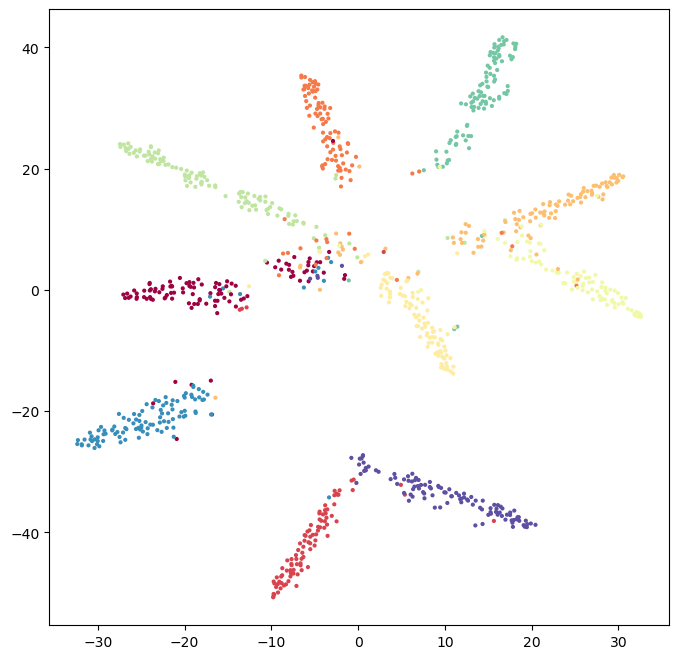

In [27]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.scatter(t_sne.embedding_[::, 0], t_sne.embedding_[::, 1], s=4, c=y_lst.cpu().numpy()[::], cmap='Spectral', alpha=1.0)
plt.show()

In [28]:
model = SupConResNet(name='resnet50')

ckpt_path = './save/ckpt_epoch_500.pth'
ckpt = torch.load(ckpt_path, map_location='cpu')
state_dict = ckpt['model']


new_state_dict = {}
for k, v in state_dict.items():
    k = k.replace("module.", "")
    new_state_dict[k] = v
state_dict = new_state_dict

model = model.cuda()
model.load_state_dict(state_dict)

f_lst = []
y_lst = []
for idx, (images, labels) in enumerate(val_loader):
    if idx > 3:
        break
    images = images.cuda(non_blocking=True)
    labels = labels.cuda(non_blocking=True)
    bsz = labels.shape[0]
    # compute loss
    y_lst.extend(labels)
    with torch.no_grad():
        features = model.encoder(images)
    f_lst.extend(features)

f_lst = torch.stack(f_lst)
y_lst = torch.stack(y_lst)

c:\Users\hui-q\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\hui-q\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


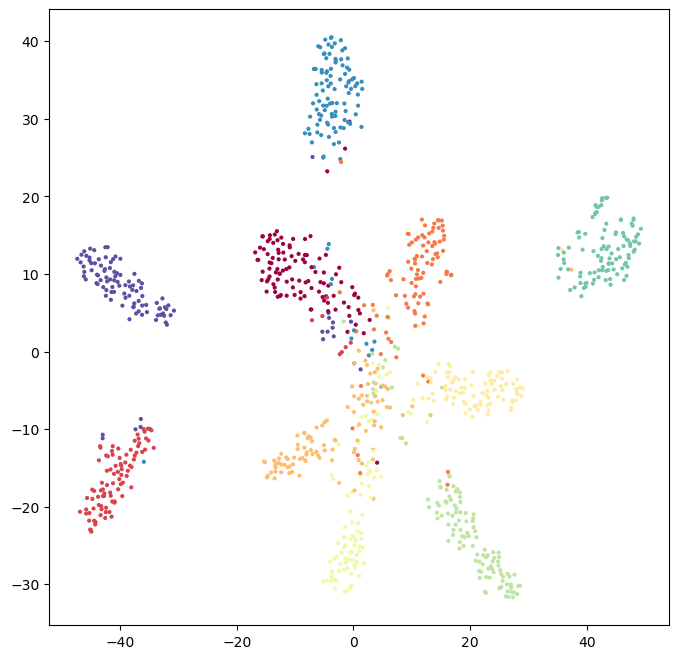

In [30]:

t_sne = TSNE(n_components=2)

t_sne.fit(f_lst.cpu())

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.scatter(t_sne.embedding_[::, 0], t_sne.embedding_[::, 1], s=4, c=y_lst.cpu().numpy()[::], cmap='Spectral', alpha=1.0)
plt.show()